# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = study_results.merge(mouse_metadata, how='left', on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
total_mices = len(mouse_study_df['Mouse ID'].unique())
total_mices

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mices = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicated_mices_ID = duplicated_mices['Mouse ID'].unique()
duplicated_mices_ID

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all = mouse_study_df.loc[mouse_study_df['Mouse ID'].isin(duplicated_mices_ID)]
duplicate_mice_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouses_study_df_new = mouse_study_df.loc[~mouse_study_df['Mouse ID'].isin(duplicated_mices_ID)]
mouses_study_df_new.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
# Checking the number of mice in the clean DataFrame.
total_mouses_new = len(mouses_study_df_new['Mouse ID'].unique())
total_mouses_new

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_mean = mouses_study_df_new.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_volume_median = mouses_study_df_new.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_volume_var = mouses_study_df_new.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_volume_std = mouses_study_df_new.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_volume_sem = mouses_study_df_new.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

tumor_volume_data = pd.concat([tumor_volume_mean, tumor_volume_median, tumor_volume_var, \
                               tumor_volume_std, tumor_volume_sem], axis = 1)
tumor_volume_data.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', \
                             'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
tumor_volume_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouses_study_df_new.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

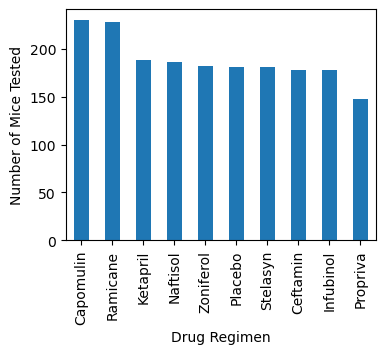

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_tested = mouses_study_df_new.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending = False)
ax = mice_tested.plot.bar(figsize = (4,3))
ax.set_ylabel('Number of Mice Tested')
plt.show()

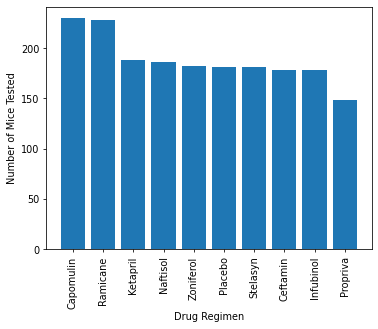

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_tested = mouses_study_df_new.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending = False)
drugs = mice_tested.index
plt.figure(figsize=(6, 4.5), dpi=70)
plt.bar(drugs, mice_tested)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()


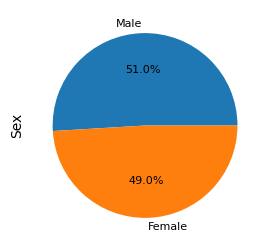

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
y = mouses_study_df_new.groupby(['Sex'])['Sex'].count().sort_values(ascending = False)
fig = y.plot.pie(autopct='%1.1f%%', figsize = (3,3), fontsize = 8)

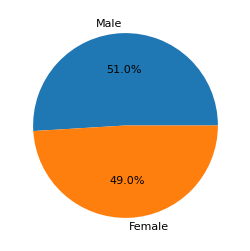

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize = (3,3))
plt.pie(y, labels = y.index, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

select_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
select_regimen_df = mouses_study_df_new.loc[mouses_study_df_new['Drug Regimen'].isin(select_regimen)]
df_max = select_regimen_df.groupby(['Mouse ID']).max()
df_max_time = df_max[['Timepoint']].reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
select_final_df = mouses_study_df_new.merge(df_max_time, how = 'inner', on = ['Mouse ID','Timepoint'])
select_final_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25


In [28]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in select_regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = select_final_df.loc[select_final_df['Drug Regimen']==i]['Tumor Volume (mm3)']
    
    # add subset 
    final_tumor_volume.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    iqr1_5 = iqr * 1.5
    lower_bound = lowerq - iqr1_5
    upper_bound = upperq + iqr1_5
    
    outliers = []
    for index, value in zip(tumor_volume.index, tumor_volume.values):
        if value > upper_bound or value < lower_bound:
            outliers.append(value)
    
    print(f"{i}'s potential outliers: {outliers}")


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


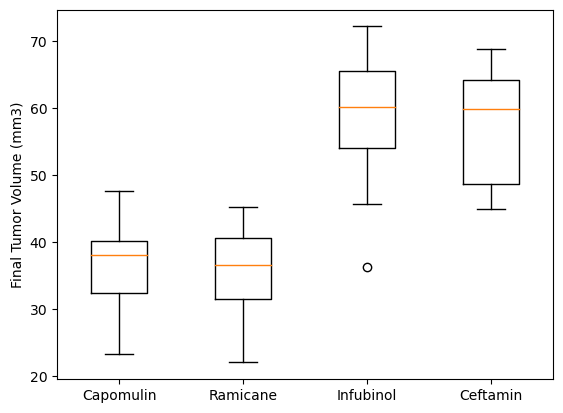

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(final_tumor_volume, labels = select_regimen)
plt.show()

## Line and Scatter Plots

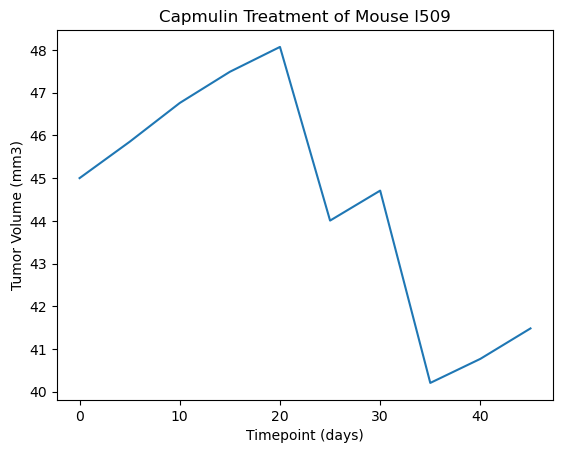

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = mouses_study_df_new.loc[mouses_study_df_new['Drug Regimen'] == 'Capomulin']
mouse = list(capomulin_df.sample()['Mouse ID'])
mouse_capomulin_df = capomulin_df.loc[capomulin_df['Mouse ID'].isin(mouse)]
mouse_capomulin_df.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)', legend = False)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capmulin Treatment of Mouse {mouse[0]}")
plt.show()

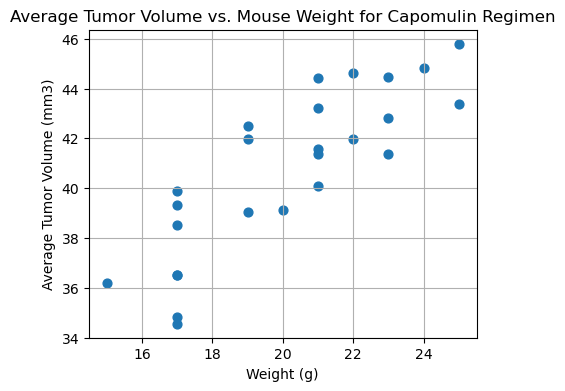

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_df = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

capomulin_avg_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', figsize=(5,4), s=40)

plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.grid()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


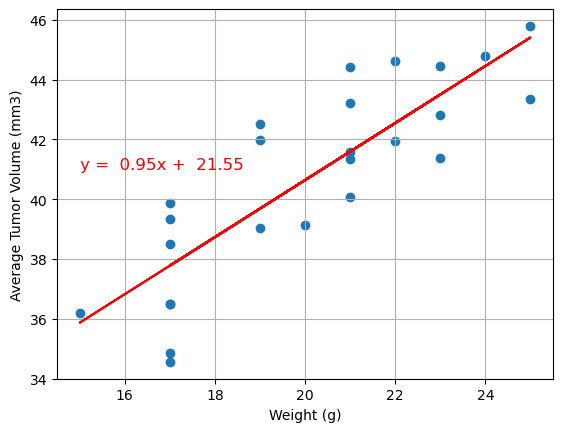

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x = capomulin_avg_df['Weight (g)']
y = capomulin_avg_df['Tumor Volume (mm3)']
slope, inter, r, p, std_err = st.linregress(x, y)
line_best = slope * x + inter
line_eq = f"y = {slope: .2f}x + {inter: .2f}"
print(f"The correlation between mouse weight and the average tumor volume is {r:.2f}")
plt.scatter(x, y)
plt.plot(x, line_best, color = 'r')
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.annotate(line_eq, (15, 41), fontsize=12, color="red")
plt.grid()
plt.show()